In [1]:
import matplotlib
import matplotlib.pyplot as plt 

pgf = False
if (pgf):
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

In [2]:
ds = ["cifar10", "mnist", "radar"]
nb_nodes= [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1000]
ticks = []

for i in range(len(nb_nodes)):
    ticks.append(i)

common_path="../log/scalability/dense/"

values=[]
values_mi=[]
spup = []
spup_mi = []




In [3]:
for i in range(len(ds)):
    dataset = ds[i]
    values.append([])
    for nb in nb_nodes:
        path = common_path + dataset + "_" + str(nb) + "_i.means"
        with open(path, "r") as f:
            val = float(f.readline().strip())
        values[i].append(val)



        


In [4]:
for i in range(len(ds)):
    dataset = ds[i]
    values_mi.append([])
    for nb in nb_nodes:
        path = common_path + dataset + "_" + str(nb) + "_mi.means"
        with open(path, "r") as f:
            val = float(f.readline().strip())
        values_mi[i].append(val)

In [5]:
print(values)
print(values_mi)

[[11.665378124999998, 5.994296363636365, 3.1396436363636364, 1.8431983333333333, 1.0147083333333333, 0.6473784166666666, 0.5152160909090909, 0.41889529999999997, 0.3950341363636363, 0.3724451818181818, 0.43361365], [1.0019669523809522, 0.5609602727272728, 0.33753536363636366, 0.23141391666666666, 0.16945254545454544, 0.15547445454545455, 0.14491972727272726, 0.15143436363636364, 0.2069957272727273, 0.1953974, 0.29559490000000005], [0.08860542727272726, 0.06739957272727273, 0.05713358181818182, 0.051967827272727266, 0.04937823636363636, 0.05182579999999999, 0.0731335818181818, 0.09395616363636364, 0.09059006363636363, 0.13592789, 0.1669717272727273]]
[[11.958512121212124, 6.305770000000001, 3.4419018181818184, 2.0486290909090914, 1.318247272727273, 0.9462753333333334, 0.8278754545454546, 0.7266957222222222, 0.689676761904762, 0.6825734000000001, 0.7990131499999998], [1.1068422727272726, 0.669153, 0.4468971818181818, 0.3402788181818182, 0.28002066666666664, 0.26091445454545453, 0.2508721

In [6]:
for i in range(len(values)):
    spup.append([])
    spup_mi.append([])
    for e in values[i]:
        spup[i].append(values[i][0] / e)
    for e in values_mi[i]:
        spup_mi[i].append(values_mi[i][0] / e)


In [7]:
print(spup)
print(spup_mi)

[[1.0, 1.9460796426026794, 3.715510254058943, 6.328878403391206, 11.496286905104093, 18.019411560034243, 22.641719330653313, 27.847956577693758, 29.530050826447564, 31.321060640528668, 26.90270042236908], [1.0, 1.7861638356484608, 2.968479929292385, 4.329761004927832, 5.912964893464663, 6.444576090074121, 6.913944507329434, 6.616509808744307, 4.840519973925888, 5.1278417849006805, 3.3896625157638107], [1.0, 1.314628916584715, 1.5508467078906305, 1.705005422060957, 1.794422680879283, 1.7096779455932618, 1.2115559647141334, 0.94305071475305, 0.9780921186720558, 0.6518561221889582, 0.5306612605618043]]
[[1.0, 1.8964396292938248, 3.474390831848073, 5.837324176581649, 9.071524264542267, 12.637455188742237, 14.444820239027319, 16.456010067932162, 17.339299773106585, 17.51974530682286, 14.966602390977076], [1.0, 1.654094463788211, 2.4767269022018286, 3.252751019418033, 3.952716368770184, 4.2421654049620585, 4.411978345648131, 4.2782375099267, 3.7999277795359534, 3.062496714333254, 2.694241273

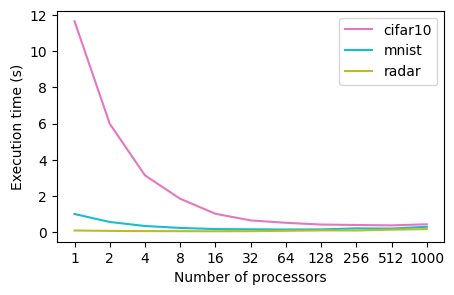

In [8]:

plt.figure(figsize=(5,3))
color = ["tab:pink", "tab:cyan", "tab:olive", "tab:brown"]

for i in range(len(ds)):
    dataset = ds[i]
    plt.plot(values[i], label=dataset, color=color[i], ls='-')

plt.ylabel('Execution time (s)')
plt.xlabel("Number of processors")
plt.xticks(ticks, nb_nodes)
plt.legend()
plt.savefig('figures/test_scalability.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('figures/test_scalability.png', bbox_inches='tight', dpi=2000)
plt.show()


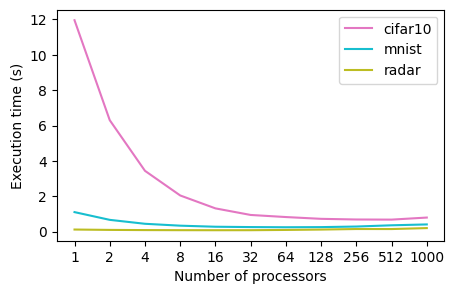

In [9]:

plt.figure(figsize=(5,3))
color = ["tab:pink", "tab:cyan", "tab:olive", "tab:brown"]

for i in range(len(ds)):
    dataset = ds[i]
    plt.plot(values_mi[i], label=dataset, color=color[i], ls='-')

plt.ylabel('Execution time (s)')
plt.xlabel("Number of processors")
plt.xticks(ticks, nb_nodes)
plt.legend()
plt.savefig('figures/test_scalability_mi.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('figures/test_scalability_mi.png', bbox_inches='tight', dpi=2000)
plt.show()


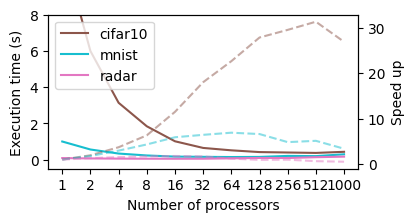

In [10]:

plt.figure(figsize=(4,2))
color = ["tab:brown", "tab:cyan", "tab:pink", "tab:purple"]

ax1 = plt.gca()

for i in range(len(ds)):
    dataset = ds[i]
    ax1.plot(values[i], label=dataset, color=color[i], ls='-')

ax1.set_ylabel('Execution time (s)')
ax1.set_xlabel("Number of processors")
ax1.set_xticks(ticks, nb_nodes)
ax1.legend(loc='upper left')
ax1.set_ylim(-0.5, 8.0)

ax2 = ax1.twinx()

for i in range(len(ds)):
    ax2.plot(spup[i], color=color[i], ls='--', alpha=0.5)

ax2.set_ylabel('Speed up')


plt.savefig('figures/exe_spup.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('figures/exe_spup.png', bbox_inches='tight', dpi=2000)

plt.show()